# Name : Guillaume Jami 
...

#Title : The New Monument Valley


#Idea / Concept / Inspiration: The concept of this selected drawings is to replicate and simulate simple perspectives and graphic effects often found in some smartphone adventure games. Through this approach, I tried to understand how simple code can give more complex impressions and visual illusions.

Many colors, effects and perspective inspiration come form this game: Monument Valley
https://www.monumentvalleygame.com/mv2

#Method: The methodology here is to use the most compact code possible and produce a maximum of geometry. 

The first image is a axonometric view imitating Daniel Kohler (UCL Bartlett) drawings

The second image try to imitate vegetation and wind animation present in some early 2000's video game

In the thrid image only one class of rectangle is used to create 2 types of geometry following several steps: 

    1 - The main rectangle is transformed and rotated to create the an axonometric effect. 
    2 - The 2 different kind of rectangle are mapped on a regular grid of point 
    3 - The points of the grid are then translated with a random parameter to create a more complexe drawing
    4 - A black background is added to contrast the geometry
    5 - two circle are used to draw a moon


In [9]:
import matplotlib.pyplot as plt
import math
import random
import ipywidgets as widgets
from ipywidgets import interact



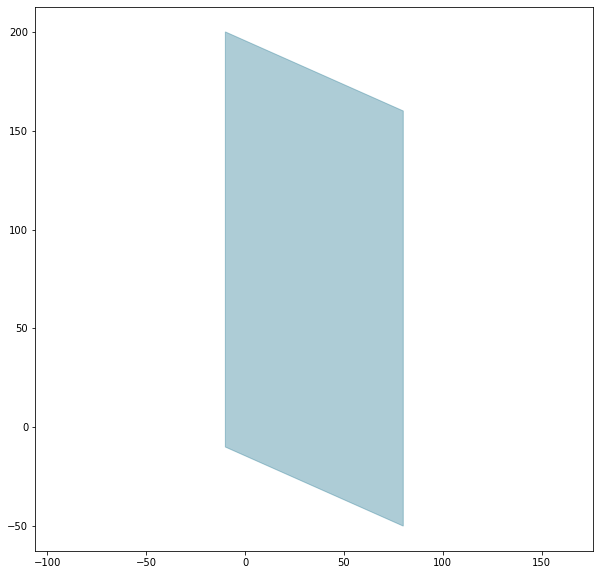

In [10]:
############################ _____________DEFINING THE BASIC RECTANGLE GEOMETRY____________################################



# ___________________________________________________ adjust parameters for rectangle Class

class Rect(object):
 
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        
        self.cx = 0.5 * ( x1 + x2 )
        self.cy = 0.5 * ( y1 + y2 )

        
        # ___________________________________________________defining the parallel move 
        
        t = 40
        
        
        # ___________________________________________________list of x and list of y coordinates
        
        
        self.x = [self.x1, (self.x1), self.x2, self.x2]
        self.y = [self.y1, (self.y2 + t), self.y2, self.y1 - t]
        
        
        # ___________________________________________________ def figure moves
        
    def move(self, _x, _y):
        
        newX = []
        newY = []
        
        for x,y in zip(self.x,self.y):
            
            x -= _x
            y -= _y
            
            newX.append(x)
            newY.append(y)
        
        self.x = newX 
        self.y = newY
        
        # ___________________________________________________ def figure rotation
    
    def rotate(self, angle):
        
        s = math.sin(angle)
        c = math.cos(angle)
        
        newX = []
        newY = []
        
        for x,y in zip(self.x,self.y):
            
        # ___________________________________________________ move point to origin
           
            x -= self.cx
            y -= self.cy
            
        # ___________________________________________________ rotate point
            
            xnew = x * c - y * s
            ynew = x * s + y * c

            #move point back
            x = xnew + self.cx
            y = ynew + self.cy
            
            newX.append(x)
            newY.append(y)
        
        self.x = newX
        self.y = newY   
    
    def display(self, colorv):
        plt.axis("equal")
        plt.fill(self.x, self.y, c=colorv, linewidth=1)

        
        
# ___________________________________________________figure size

plt.figure(figsize=(10,10))

# ___________________________________________________set limits of axis

plt.xlim(-50, 250)
plt.ylim(-50, 250)

ct = [random.random(), 0.5, 0.6, 0.4]

r = Rect(-10,-10,80,160)
r.display(ct)


<ipython-input-11-c62f59471b09>:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


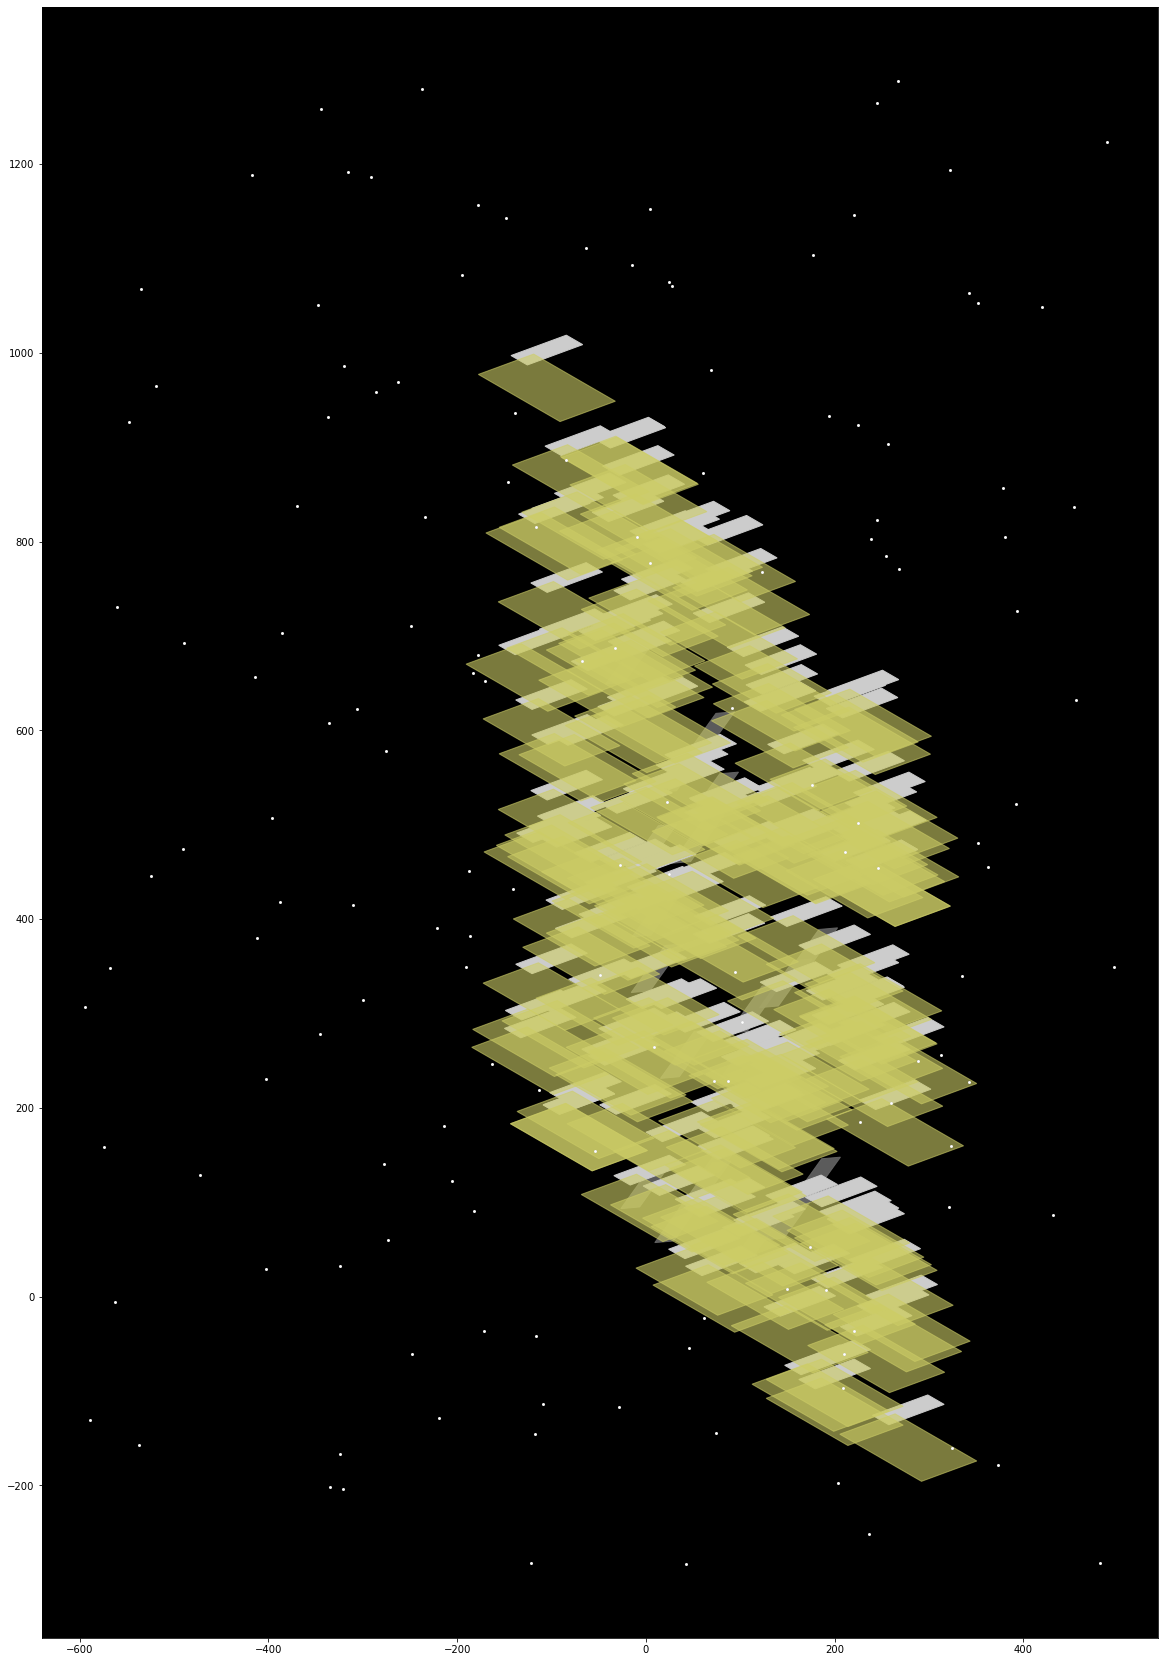

In [11]:
############################ _____________First Drawing generation____________###############################



# ___________________________________________________ figure size definition


plt.figure(figsize=(20,30))


# ___________________________________________________List for the 3 drawing layers

rects  = []
rects1 = []
rects2 = []

# ___________________________________________________design parameters

rotation = 60
h = 40 
k = 4

# ___________________________________________________ 'Rectangle and rectangle1 definition'


for x in range (k):
    for y in range (h):
        x=0.04
        r = Rect(x*100+50, (y*20)+50, (x+1)*50+50, (y+1)*20+10)
        r.rotate(math.radians(rotation))
        
        r1 = Rect(x*100+50, (y*20)-30, (x+1)*50+50, (y+1)*20+10)
        r1.rotate(math.radians(rotation))
        
        
        distance = random.randint(-200,200)
        
        
        r.move(distance , -distance)
        rects.append(r)
        
        r1.move(distance , -distance)
        rects1.append(r1)

# ___________________________________________________ 'staires definition'


for x in range (int(k/2)):
    for y in range (0,h-10,3):
        
        x=0.07
       
        r2 = Rect(x*100+50, (y*20)+50, (x+1)*50+50, (y+1)*20+10)
        r2.rotate(math.radians(95))
        
        distance = random.randint(-100,100)
        
        r2.move (distance , -distance)
        rects2.append(r2)

# ___________________________________________________ white random point backrgound       
        
x, y = [],[]  
for i in range(-200,1300,100):
    for j in range (-500,500,100):
        
        x.append(j + random.randint(-100,100))
        y.append(i + random.randint(-100,100))

plt.plot(x, y, 'o', color='white',
                markersize=3, linewidth=0.1,
                markerfacecolor='white',
                markeredgecolor='gray',
                markeredgewidth=0.1)
 
# ___________________________________________________ Drawing layers

###### layer 3

for rs in rects2:
    ct = [0.4, 0.4, 0.4, 0.9]
    rs.display(ct)
    
###### layer 2
    
for rs in rects:
    ct = [0.8, 0.8, 0.8, 1]
    rs.display(ct)
    
###### layer 1

for rs in rects1:
    ct = [0.8, 0.8, 0.4, 0.6]
    rs.display(ct)

###### background

ax = plt.axes()
ax.set_facecolor('black')
 
# ___________________________________________________ END
    


In [14]:
#################################### _____________Wind GIF animation____________####################################



rects = []
x = 0.2


#__________________________________________________Slider widget setting

@interact(windp = widgets.IntSlider(min=1, max=60, step=1, value=8))

#__________________________________________________Integrating the rectangle class in the 'wind' definition
#__________________________________________________This function will increase the movement of the rectangles according y  

def wind(windp):
    
    plt.figure(figsize=(30,30))
    
    ax = plt.axes()
    ax.set_facecolor('darkslategrey')
    plt.ylim(-300,1000)
    plt.xlim(2000,-4000)
        
    
    for x in range (4):
        for y in range (windp):
            r = Rect(x*100 + x +5,(y*100 + y), (x+1)*50+ x+5, (y+1)*100+ y)
            r.rotate(math.radians(45))
        
            distance = random.randint(0,r.cy) * 1
        
            r.move(distance , -distance)
            rects.append(r)

    for rs in rects:
        ct = [0.5, 0.8, 0.6, 0.8]
        rs.display(ct)
        
        

        
wind(windp)

interactive(children=(IntSlider(value=8, description='windp', max=60, min=1), Output()), _dom_classes=('widget…

NameError: name 'windp' is not defined

<ipython-input-5-b629a43c52cf>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


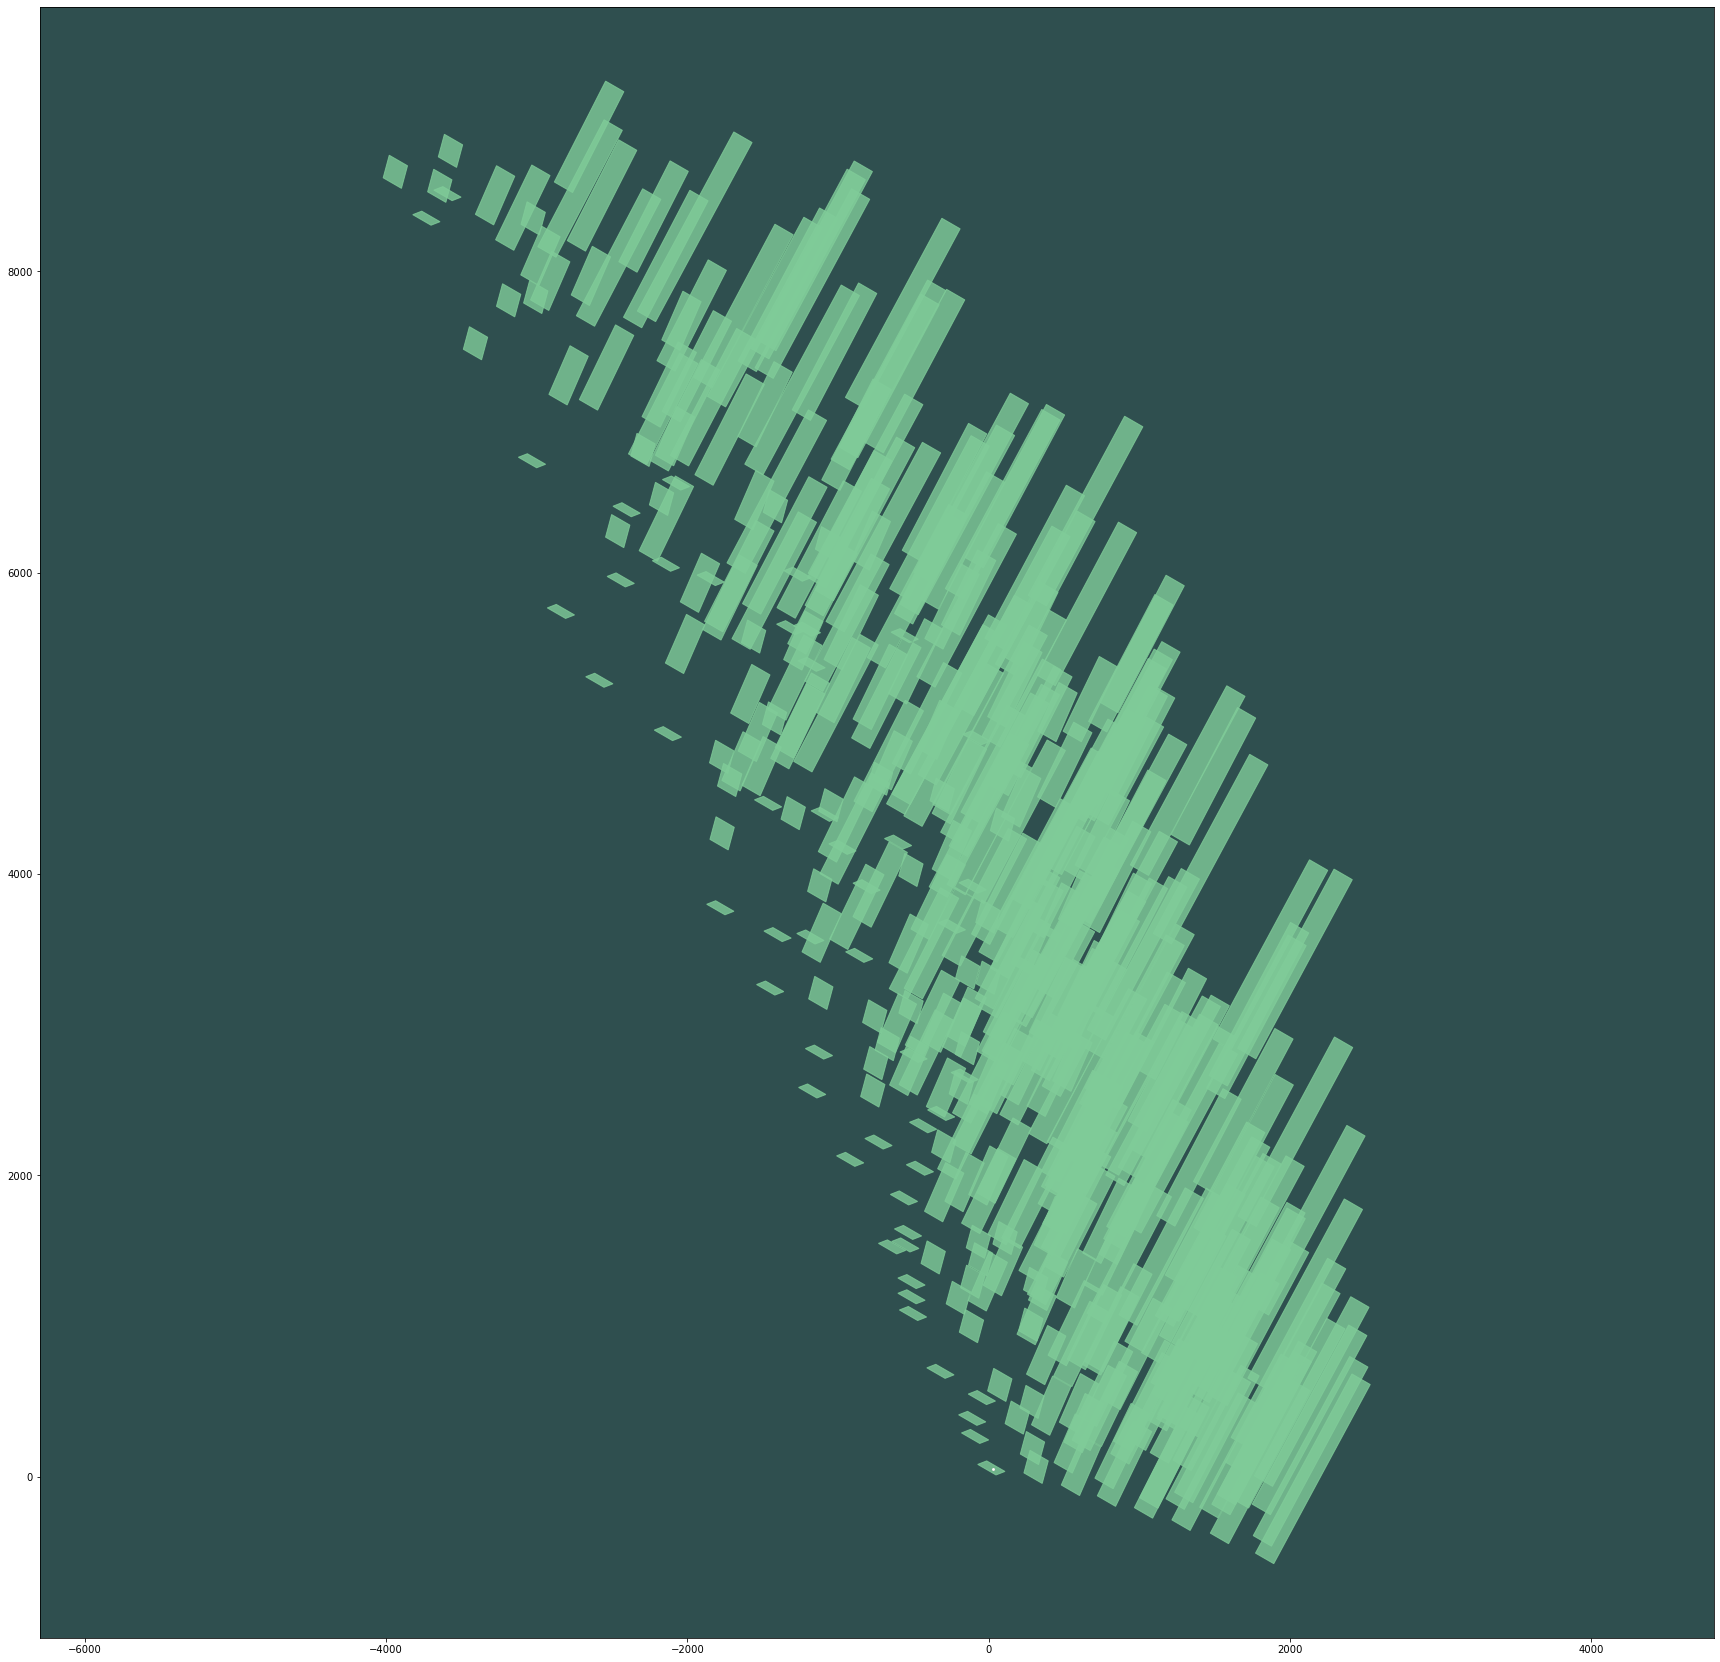

In [5]:
#################################### _____________Second Drawing generation____________####################################
plt.figure(figsize=(30,30))
plt.axis ('equal')

#____________________________________________________________

rects = []
x = 0.2

#____________________________________________________________Integrating the rectangle class in a series of coordinates
#____________________________________________________________This function will increase the movement of the rectangles according y                                                             

for x in range (0,30,4):
    for y in range (50):
        r = Rect(x*100 + x,(y*100 + y), (x+1)*50+ x, (y+1)*100+ y)
        r.rotate(math.radians(60))
        
        distance = random.randint(0,r.cy) * 1
        
        r.move(distance , -distance)
        rects.append(r)

#____________________________________________________________Display setting

for rs in rects:
    ct = [0.5, 0.8, 0.6, 0.8]
    rs.display(ct)


plt.plot(x, y, 'o', color='white',
                markersize=3, linewidth=0.05,
                markerfacecolor='white',
                markeredgecolor='gray',
                markeredgewidth=0.1)

ax = plt.axes()
ax.set_facecolor('darkslategrey')

<ipython-input-8-b3049f7ec5a7>:93: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


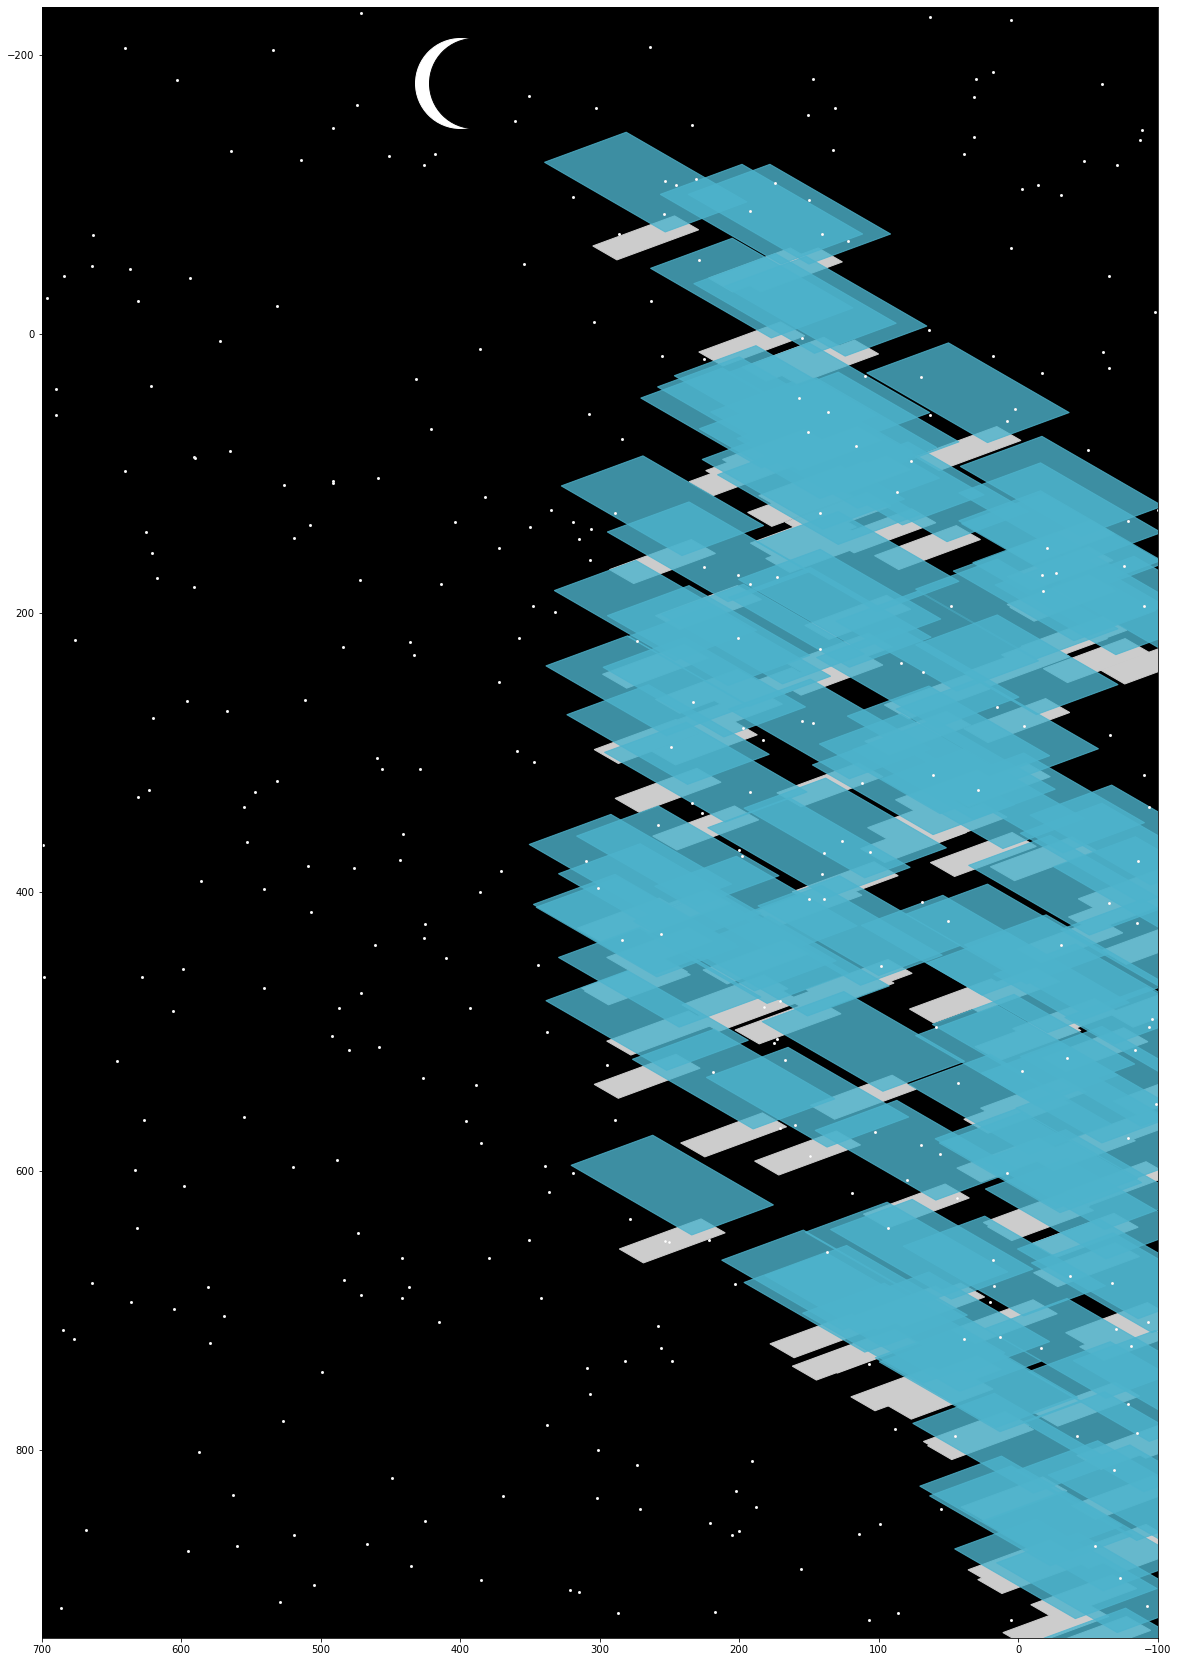

In [8]:
################################### _____________third Drawing generation____________#######################################


# ___________________________________________________ figure size definition


plt.figure(figsize=(20,30))


# ___________________________________________________List for the 3 drawing layers

rects  = []
rects1 = []
rects2 = []

# ___________________________________________________design parameters

rotation = 60
h = 40 
k = 50

# ___________________________________________________ 'Rectangle and rectangle1 definition'


for x in range (0,k,20):
    for y in range (h):
        x=0.04
        r = Rect(x*100+50, (y*20)+50, (x+1)*50+50, (y+1)*20+10)
        r.rotate(math.radians(rotation))
        
        r1 = Rect(x*100+50, (y*20)-30, (x+1)*50+50, (y+1)*20+10)
        r1.rotate(math.radians(rotation))
        
        
        distance = random.randint(-200,200)
        
        
        r.move(distance , -distance)
        rects.append(r)
        
        r1.move(distance , -distance)
        rects1.append(r1)

# ___________________________________________________ white random point backrgound       
        
x, y = [],[]  
for i in range(-200,1300,50):
    for j in range (-500,700,50):
        
        x.append(j + random.randint(-100,100))
        y.append(i + random.randint(-100,100))

plt.plot(x, y, 'o', color='white',
                markersize=3, linewidth=0.1,
                markerfacecolor='white',
                markeredgecolor='gray',
                markeredgewidth=0.1)

# ___________________________________________________ Moon


plt.plot(400, -180, 'o', color='white', markersize=90)

plt.plot(390, -180, 'o', color='black', markersize=90)


 
# ___________________________________________________ Different drawing layers

###### layer 3

#for rs in rects2:
   # ct = [0.4, 0.4, 0.4, 0.9]
   # rs.display(ct)
    
###### layer 2
    
for rs in rects:
    ct = [0.8, 0.8, 0.8, 1]
    rs.display(ct)
    
###### layer 1

for rs in rects1:
    ct = [0.3, 0.7, 0.8, 0.8]
    rs.display(ct)

###### background

plt.ylim(800, -100)
plt.xlim(700, -100)

ax = plt.axes()
ax.set_facecolor('black')
